# KNN-regressor
Use k nearest neighbours to make prediction about process output

In [195]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.optimize import differential_evolution
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Wczytaj i oczyść dane

In [227]:
def changeDateToSeconds(df):
    first = df["date"][0]
    df["date"] = df["date"].apply(lambda timestamp: (timestamp-first).seconds)
    return df

def readDataFromExcel(path, sheet):
    df = pd.read_excel(path, sheet_name=sheet, na_values=[" Bad Data","Bad Data"])
    df["date"] = pd.to_datetime(df["date"])
    df = changeDateToSeconds(df)
    return df

df2 = readDataFromExcel("./data/K-1_MI.xlsx", "d2")
df3 = readDataFromExcel("./data/K-1_MI.xlsx", "d3")
df5 = readDataFromExcel("./data/K-1_MI.xlsx", "d5")
df6 = readDataFromExcel("./data/K-1_MI.xlsx", "d6")

df6 = df6.iloc[::5, :] # dopasuj okresy próbkowania

dataFrames = [df2, df3, df5, df6]

for i, df in enumerate(dataFrames):
    if np.isnan(np.sum(df.values)):
        dataFrames[i] = dataFrames[i].interpolate()

In [228]:
all_dfs = dataFrames[0].append(dataFrames[1]).append(dataFrames[2]).append(dataFrames[3])
scaler = preprocessing.StandardScaler()
pure_data = all_dfs.drop(["date"], axis=1)
columns = pure_data.columns
scaler.fit(pure_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [229]:
np.isnan(np.sum(scaled_data))

False

In [87]:
dataFrames[2]

,date,FP05,LT1,LT2,LT3,LT4,TMA,TMB,TMC,TMD,...,PTWS,TW02,TW01,FW03,TW04,TW03,FW04,TTWT,PTWT,PPW
0,0,1081.4991,9.6676,-4.0825,11.714,9.9923,75.2533,55.7317,55.4180,58.1740,...,19.6470,538.6156,324.4563,0.0000,541.0661,310.4243,9.8722,176.4025,10.5377,3.4916
1,10,1081.4991,9.6676,-4.0825,11.714,9.9923,75.2533,55.7317,55.4180,58.1740,...,19.6360,538.6156,324.4563,0.0000,541.0661,310.4243,9.8722,176.4025,10.5377,3.4916
2,20,1079.9686,9.6676,-4.0825,11.714,9.9923,75.2533,55.7317,55.4180,58.1740,...,19.6360,538.6156,324.4563,0.0000,541.0661,310.4243,9.8722,176.4025,10.5377,3.4916
3,30,1079.9686,9.6676,-4.0825,11.714,9.9923,75.2533,55.7317,55.4180,58.1740,...,19.6195,538.6156,324.4563,0.0000,539.9727,310.4243,9.8722,176.4025,10.5268,3.4916
4,40,1079.9686,9.6676,-4.0825,11.714,9.9923,75.2533,55.7317,55.4180,58.1740,...,19.6195,538.6156,324.4563,0.0000,539.9727,310.4243,9.8722,176.4025,10.5268,3.4916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,9940,1072.3688,15.1995,2.3119,11.714,9.9923,72.1319,57.5103,54.3721,58.5927,...,19.4740,539.5197,321.0358,0.0000,540.4623,306.1097,10.4318,176.7647,10.4490,3.4771
995,9950,1072.3688,15.1995,2.3119,11.714,9.9923,72.1319,57.5103,54.3721,58.5927,...,19.4740,539.5197,321.0358,0.0000,540.4623,306.1097,10.4318,176.7647,10.4490,3.4771
996,9960,1072.3688,15.1995,2.3119,11.714,9.9923,72.1319,57.5103,54.3721,58.5927,...,19.4863,539.5197,321.0358,0.0000,540.4623,306.1097,10.4318,176.7647,10.4490,3.4771
997,9970,1072.3688,15.1995,2.3119,11.714,9.9923,72.1319,57.5103,54.3721,58.5927,...,19.4863,539.5197,322.8242,5.0621,540.4623,306.1097,10.4318,176.7647,10.4300,3.4771


In [230]:
scaledDataFrames = list()
for df in dataFrames:
    x = scaler.transform(df.drop(["date"], axis=1))
    scaledDataFrames.append(pd.DataFrame(x, columns=columns))

In [231]:
all_dfs = scaledDataFrames[0].append(scaledDataFrames[1]).append(scaledDataFrames[2]).append(scaledDataFrames[3])
scaled_inputs = all_dfs.drop(["LT01"], axis=1)
 
pca = PCA(0.99)
pca.fit(scaled_inputs)

principal_components = list()
for sdf in scaledDataFrames:
    pc = pca.transform(sdf.drop(["LT01"], axis=1))
    principal_components.append(pd.DataFrame(pc))

In [218]:
principal_components[1]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-2.428805,2.518883,-0.248776,-2.236958,-2.836883,1.371784,2.299281,1.179536,-0.169418,-1.313724,...,0.143510,0.201674,-0.034712,-0.179211,-0.134231,-0.285363,-0.082037,-0.296220,-0.973203,0.069395
1,-2.429287,2.508340,-0.211119,-2.249929,-2.833570,1.378844,2.319447,1.152113,-0.154529,-1.310688,...,0.143557,0.194673,-0.046294,-0.170620,-0.066289,-0.317487,-0.291788,-0.295620,-1.002239,0.054701
2,-2.421074,2.436677,-0.247365,-2.180409,-2.728877,1.471329,2.372253,1.110862,-0.052842,-1.229960,...,0.101438,0.238607,0.003451,-0.205498,-0.268869,-0.200967,0.370736,-0.275741,-0.757978,0.105304
3,-2.534240,2.446244,-0.330390,-2.036740,-2.690038,1.537762,2.355066,1.121849,-0.003519,-1.447087,...,0.004567,0.057657,-0.112970,-0.309975,-0.176325,-0.170677,0.363217,-0.189576,-0.552812,0.081245
4,-2.440653,3.160518,0.073071,-2.312159,-2.784323,1.213127,2.398273,1.466710,-0.240877,-1.437273,...,0.396815,0.168413,-0.408537,-0.403449,0.013857,-0.099230,-0.268555,0.744583,0.087664,0.396168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-3.047736,2.208581,-1.111994,2.619657,-1.897004,3.024290,-0.924902,-1.310129,-0.575460,0.141189,...,0.014730,0.347205,-0.485195,0.220576,-0.131637,0.005711,0.045708,-0.652879,0.196932,-0.170681
995,-3.118614,2.145383,-1.061651,2.531584,-1.996341,2.999106,-0.913455,-1.444858,-0.684658,0.161611,...,0.042887,0.488480,-0.295885,0.379189,-0.175505,-0.030742,-0.306804,-0.613682,0.127681,-0.136672
996,-3.085768,2.084995,-1.104100,2.506580,-1.923136,3.046288,-0.815887,-1.483476,-0.636100,0.308176,...,0.084716,0.553433,-0.206555,0.416751,-0.309687,0.021097,-0.219482,-0.603627,0.124516,-0.157819
997,-3.127895,2.100759,-0.996791,2.485543,-2.032512,2.994630,-0.903899,-1.554290,-0.697223,0.151281,...,0.052951,0.562043,-0.226210,0.474081,-0.140305,-0.095836,-0.716415,-0.564585,0.026121,-0.164137


### Tworzenie macierzy regresji

In [7]:
def prepareSignals(df, inputs, output, medfilt=False, kernelSize=11):
    inputSignals = df[inputs]
    outputSignal = df[output]
    inputFrame = pd.concat([inputSignals, outputSignal.shift(1)], axis=1).iloc[1:]

    if(medfilt == True):
        u_signals = applyMedianFilter(inputFrame.to_numpy(), kernelSize)
        y_signal = applyMedianFilter(df[output].iloc[1:].to_numpy(), kernelSize)

    else:
        u_signals = inputFrame.to_numpy()
        y_signal =  df[output].iloc[1:].to_numpy()
        
    return (u_signals, y_signal)

In [8]:
def createModelMatrixForSingleInput(data, order, delay, exponent):
    if(order < 0 or delay < 0 or exponent <= 0):
        raise AssertionError("Invalid structure parameter")
        
    samples = data.shape[0]
    widthCoefficient = (order + 1)*exponent
    heightAbsoluteTerm = order + delay
    
    A = np.zeros([samples - heightAbsoluteTerm, widthCoefficient])
    
    for j in range(order+1):
        for k in range(exponent):
            colIndex = (order-j)*exponent + k
            A[:, colIndex] = np.power(data[j : samples-heightAbsoluteTerm+j], k+1)
    
    return A

In [9]:
def findMaxDelayAndOrder(M):
    maxDelay = 0; maxOrder = 0
    for index, parameters in enumerate(M.T):
        order, delay, exponent = parameters
        if(order > maxOrder):
            maxOrder = order
        if(delay > maxDelay):
            maxDelay = delay
    
    return maxDelay, maxOrder

In [10]:
def createModelMatrix(data, M):
    if(M.shape[0] != 3):
        raise AssertionError("Invalid parameter vector size")

    if(M.shape[1] != data.shape[1]):
        raise AssertionError("Mismatched size of data: {} and M: {} vector".format(data.shape, M.shape))
        
    inputs = M.shape[1]
    height = data.shape[0]
    
    maxDelay, maxOrder = findMaxDelayAndOrder(M)
    A = np.empty(shape=(height-maxOrder-maxDelay, 0)) 
    for index, parameters in enumerate(M.T):
        # stworz macierz dla danego wejscia
        inputData = data[:, index]
        order, delay, exponent = parameters
        Ap = createModelMatrixForSingleInput(data[:, index], order, delay, exponent)
        
        # obetnij macierz - delay od góry, a order od dołu macierzy
        delayMaxDiff = np.abs(maxDelay-delay)
        orderMaxDiff = np.abs(maxOrder-order)
        baseHeight = Ap.shape[0]
        validA = Ap[orderMaxDiff+delayMaxDiff:]
        validA = validA[:A.shape[0]]
        
        # dodaj do akumulatora
        A = np.concatenate((A, validA), axis=1)
        
    return A

### KNNregressor

In [232]:
class KNNRegressor:
    def __init__(self, k=1):
        self.learning_set = list()
        
    def add_data(self, data, output):
        self.learning_set.append((data, output))
        
    def find_distance(d1, d2):
        return np.linalg.norm(d1-d2)
    
    def predict(self, data):
        closest = (KNNRegressor.find_distance(self.learning_set[0][0], data), self.learning_set[0][1])
        for ld in self.learning_set:
            distance = KNNRegressor.find_distance(ld[0], data)
            if distance < closest[0]:
                closest = (distance, ld[1])
        return closest

In [234]:
principal_components[0]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-3.156928,-3.446978,-0.151461,-1.657062,-0.303339,-0.203015,0.449250,-0.685666,-0.452219,0.764027,...,-0.027357,-0.278299,0.232370,0.137675,-0.142852,-0.017190,0.053510,0.199433,-0.030348,-0.050053
1,-3.087551,-3.446664,-0.211120,-1.629209,-0.212820,-0.158984,0.523962,-0.644179,-0.387501,0.848194,...,-0.008539,-0.343093,0.165108,0.059533,-0.108219,-0.024729,0.015551,0.219176,-0.083790,-0.160172
2,-3.200554,-3.295583,-0.134306,-1.472904,-0.295743,-0.178166,0.450246,-0.502997,-0.347075,0.722024,...,-0.064648,-0.562469,-0.096038,-0.142410,0.164648,-0.043882,0.278836,0.184406,0.038393,-0.094814
3,-3.135444,-3.350510,-0.130471,-1.602904,-0.314445,-0.232414,0.415075,-0.546194,-0.432508,0.694168,...,-0.019349,-0.424991,0.028502,0.015220,0.032419,-0.057865,0.000056,0.154394,-0.104675,-0.096620
4,-3.095369,-3.437128,-0.111618,-1.733877,-0.384637,-0.293958,0.367008,-0.662665,-0.554591,0.617273,...,-0.009763,-0.228210,0.233288,0.209643,-0.176224,-0.040233,-0.094828,0.148837,-0.127941,-0.004981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-4.080543,-4.568230,-1.330153,0.636247,-1.877483,-0.159972,-2.159195,1.466051,3.931289,-0.108050,...,-0.514920,-0.332344,0.371797,-0.431213,-0.820541,-0.232833,-0.479085,0.168853,0.217979,0.046627
995,-4.070561,-4.910262,-1.564344,0.694352,-2.211764,0.154825,-2.039021,1.235866,3.310610,-0.361008,...,-0.385511,-0.131254,0.400897,-0.538583,-0.587691,-0.165512,-0.076978,0.264698,0.123566,0.268958
996,-4.023359,-5.270163,-1.853874,0.611214,-2.392024,0.493511,-1.375875,0.977568,2.667954,-0.069399,...,-0.006903,-0.062148,0.784762,-0.357076,-0.615568,-0.094019,-0.299091,0.422125,0.128170,0.126541
997,-3.894928,-5.443242,-2.067088,0.712628,-2.318445,0.404358,-1.173465,0.863224,2.341399,-0.058036,...,0.098089,0.097373,0.788728,-0.384258,-0.748538,-0.161337,-0.382173,0.497209,0.104963,0.121653


In [241]:
df0 = principal_components[0].copy()
df0.insert(22, "LT01", scaledDataFrames[0]["LT01"].values)
[train0, test0] = train_test_split(df0, random_state=0)

df1 = principal_components[1].copy()
df1.insert(22, "LT01", scaledDataFrames[1]["LT01"].values)
[train1, test1] = train_test_split(df0, random_state=0)

df2 = principal_components[2].copy()
df2.insert(22, "LT01", scaledDataFrames[2]["LT01"].values)
[train2, test2] = train_test_split(df0, random_state=0)

df3 = principal_components[3].copy()
df3.insert(22, "LT01", scaledDataFrames[3]["LT01"].values)
[train3, test3] = train_test_split(df0, random_state=0)

In [242]:
train1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,LT01
780,-4.934693,-3.064249,-0.931925,0.093217,0.186787,0.422892,-1.680097,0.038776,2.428544,-0.611991,...,-0.081037,-0.165977,0.093169,0.029010,0.305759,-0.450426,0.428569,0.079908,0.052685,0.953996
253,-2.649660,-3.782597,-0.274128,-1.604717,-2.567985,-0.424460,0.278821,0.655947,-0.692734,0.723123,...,-0.169385,-0.060557,-0.081655,-0.115827,-0.027432,-0.211844,-0.363899,-0.204071,0.405716,0.338676
363,-2.265333,-2.956363,0.812323,-2.017182,-1.041228,-0.000693,0.406029,0.016472,-0.485962,1.275736,...,-0.379802,-0.253813,0.181339,0.336307,0.204011,-0.166242,-0.301650,-0.053390,0.321114,-0.126163
803,-4.814901,-2.807221,-0.318390,-0.246740,0.771502,0.095268,-1.472109,-0.662312,2.164196,-0.343214,...,0.386015,0.012387,0.262825,-0.126932,0.287917,0.114331,0.140907,0.005441,0.080498,0.630944
817,-4.875847,-2.545249,-0.140987,-0.337150,0.846034,-0.221789,-1.793906,-0.617105,2.247975,-0.483318,...,0.409420,-0.085310,0.063921,-0.197668,0.086657,-0.121324,0.072815,-0.121550,0.016385,-0.647699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-4.981266,-2.288705,-0.239029,-0.466334,1.238874,-0.038696,-1.236320,-0.860234,1.251621,0.021491,...,0.403498,0.076430,-0.059678,0.054853,-0.003225,-0.121220,0.197675,0.001170,-0.112161,0.498517
192,-3.794277,-3.184701,-0.442340,-1.238513,1.222071,0.315110,1.293015,-0.812718,-0.547040,-0.170608,...,-0.131672,0.293243,-0.345454,0.521522,-0.544341,-0.043206,0.373024,0.183060,0.022806,-2.076118
629,-2.772136,-3.156238,0.314875,-1.637204,-1.982680,-1.169829,0.737900,0.793183,0.236231,0.490929,...,-0.460142,-0.539302,-0.373196,-0.197141,0.046716,-0.039776,-0.433611,0.216245,0.203648,0.450071
559,-3.801696,-3.418524,-0.315931,-1.430140,-0.443191,0.025979,0.999254,-0.447398,-0.729142,0.017364,...,0.291200,0.044852,-0.353723,0.200670,-0.155280,-0.308578,0.223551,0.081804,0.086691,0.393114


In [265]:
knn = KNNRegressor()
for idx, row in enumerate(zip(train0.drop(["LT01"],axis=1).iterrows(), train0["LT01"])):
    inputs = row[0][1].values
    output = row[1]
    knn.add_data(inputs, output)
    
for idx, row in enumerate(zip(train1.drop(["LT01"],axis=1).iterrows(), train1["LT01"])):
    inputs = row[0][1].values
    output = row[1]
    knn.add_data(inputs, output)
    
for idx, row in enumerate(zip(train2.drop(["LT01"],axis=1).iterrows(), train2["LT01"])):
    inputs = row[0][1].values
    output = row[1]
    knn.add_data(inputs, output)

In [266]:
model_output = knn.predict(test0.drop(["LT01"],axis=1).values[1])[1]
real_output = test0["LT01"].values[1]
print(model_output, real_output)

-1.1764923877644888 -1.5137737159069178


In [273]:
model_outputs = list()
real_outputs = list()
errors = list()
for i in range(len(test0)):
    model_output = knn.predict(test0.drop(["LT01"],axis=1).values[i])[1]
    real_output = test0["LT01"].values[i]
    error = (model_output - real_output)
    
    model_outputs.append(model_output)
    real_outputs.append(real_output)
    errors.append(error)

(array([ 4.,  3.,  3., 11.,  9., 11., 30., 18., 18., 32., 29., 18.,  9.,
        16., 13.,  8.,  4.,  2.,  4.,  3.,  3.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-1.1692576 , -1.04228494, -0.91531228, -0.78833962, -0.66136696,
        -0.5343943 , -0.40742164, -0.28044898, -0.15347632, -0.02650366,
         0.100469  ,  0.22744166,  0.35441432,  0.48138698,  0.60835964,
         0.7353323 ,  0.86230496,  0.98927762,  1.11625028,  1.24322294,
         1.3701956 ,  1.49716826,  1.62414093,  1.75111359,  1.87808625,
         2.00505891,  2.13203157,  2.25900423,  2.38597689,  2.51294955,
         2.63992221]),
 <a list of 30 Patch objects>)

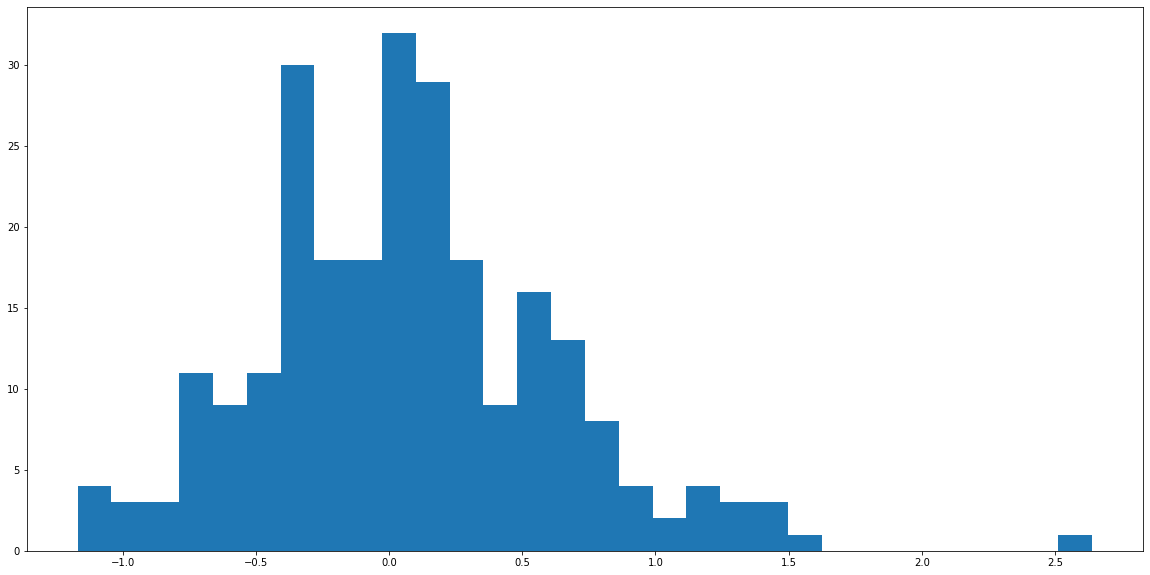

In [290]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.hist(errors, bins=30)

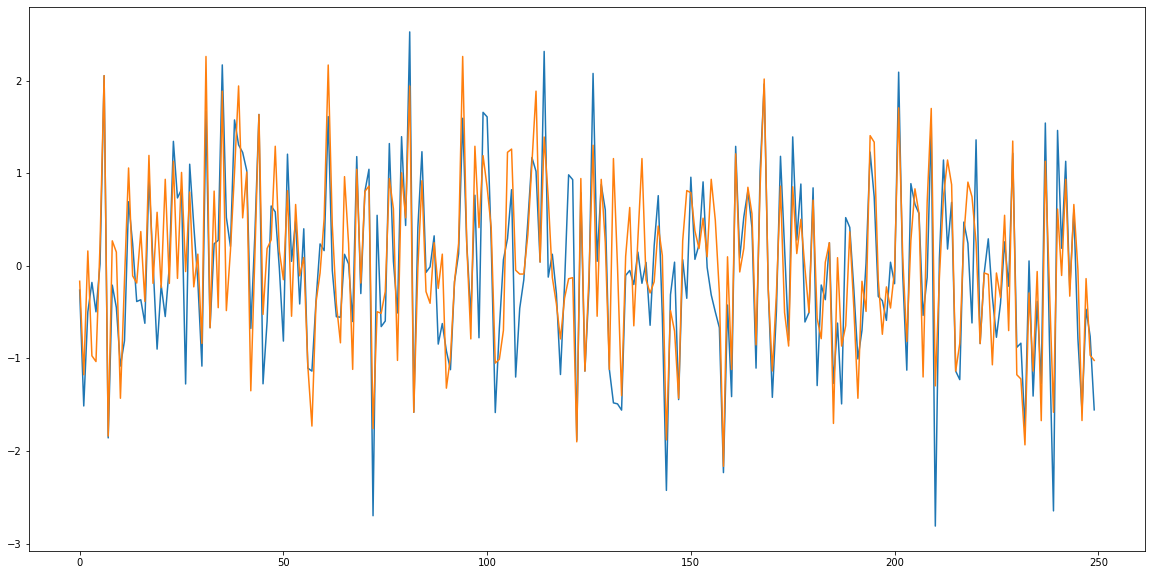

In [291]:
plt.plot(real_outputs)
plt.plot(model_outputs)

In [284]:
model_outputs3 = list()
real_outputs3 = list()
errors3 = list()
for i in range(len(test3)):
    model_output = knn.predict(test1.drop(["LT01"],axis=1).values[i])[1]
    real_output = test1["LT01"].values[i]
    error = (model_output - real_output)
    
    model_outputs3.append(model_output)
    real_outputs3.append(real_output)
    errors3.append(error)

(array([10., 31., 66., 79., 38., 14., 10.,  1.,  0.,  1.]),
 array([-1.1692576 , -0.78833962, -0.40742164, -0.02650366,  0.35441432,
         0.7353323 ,  1.11625028,  1.49716826,  1.87808625,  2.25900423,
         2.63992221]),
 <a list of 10 Patch objects>)

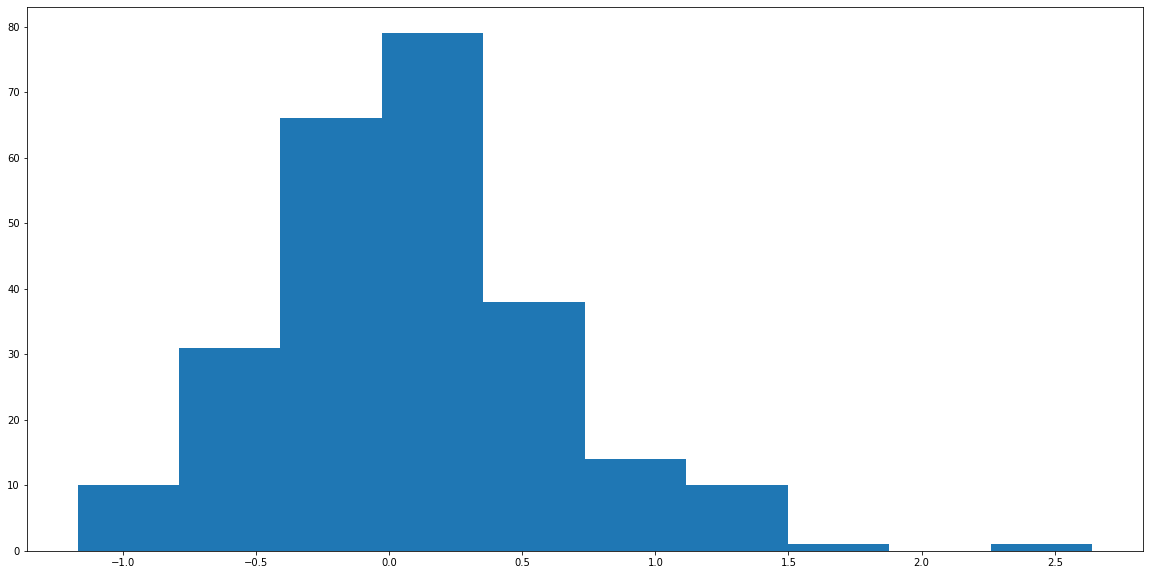

In [292]:
plt.hist(errors3)

0.6142121501327307


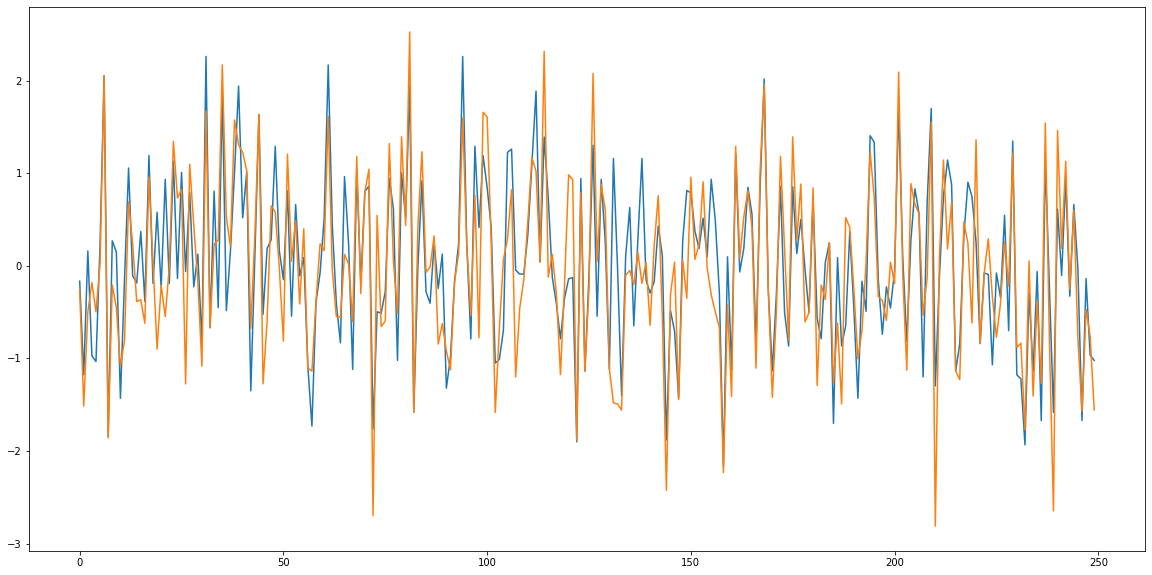

In [293]:
plt.plot(model_outputs3)
plt.plot(real_outputs3)
print(r2_score(model_outputs3, real_outputs3))